In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **Data exploration**

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#selecting the survival data for females
women = train_data.loc[train_data.Sex == 'female']["Survived"] 
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women*100)

% of women who survived: 74.20382165605095


In [7]:
#seulement quand survived ==1
men_survived = train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1), "Survived"]
rate_men = sum(men_survived)/len(men_survived)

print("% of men who survived:", rate_men)


% of men who survived: 1.0


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men*100)


% of men who survived: 18.890814558058924


# **Data Visualisation**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


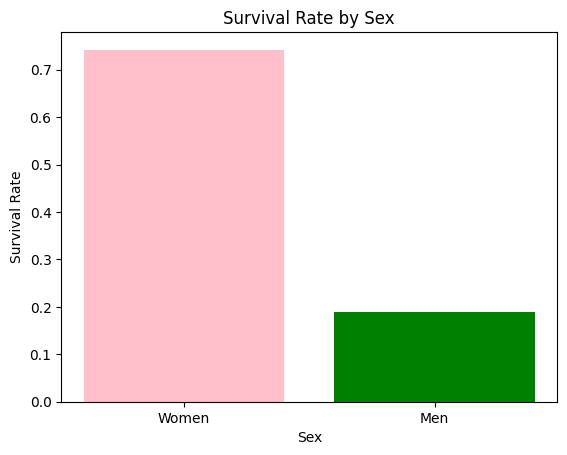

In [10]:
women_survived = sum(train_data.loc[train_data.Sex == 'female']["Survived"]) / len(train_data.loc[train_data.Sex == 'female'])
men_survived = sum(train_data.loc[train_data.Sex == 'male']["Survived"]) / len(train_data.loc[train_data.Sex == 'male'])

# Create labels and data for the plot
labels = ['Women', 'Men']
survival_rates = [women_survived, men_survived]

# Create the plot
plt.bar(labels, survival_rates, color=['pink', 'green'])

# Add titles and labels
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


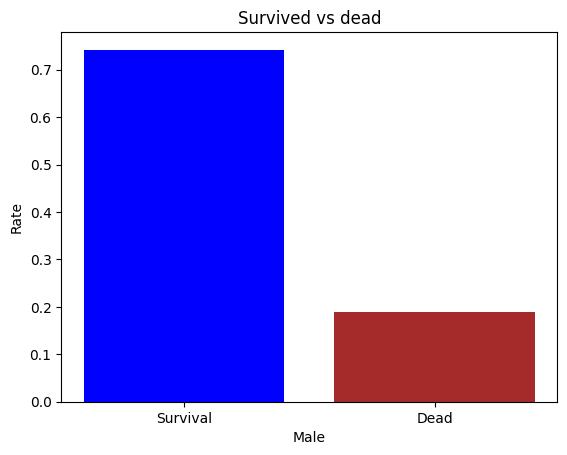

In [11]:
Msurvived = sum(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1), "Survived"])
Mdead = len(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 0)])



labels = ['Survival', 'Dead']
male_survival_rates = [Msurvived, Mdead]


#  plot
plt.bar(labels, survival_rates, color=['blue', 'brown'])

# Add titles and labels
plt.title('Survived vs dead')
plt.xlabel('Male')
plt.ylabel('Rate')

# Show the plot
plt.show()

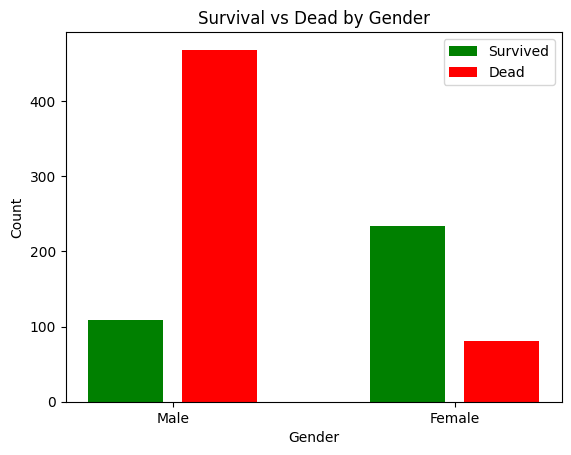

In [12]:

Msurvived = sum(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1), "Survived"])
Mdead = len(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 0)])

# Calculate survival and dead counts for females
Fsurvived = sum(train_data.loc[(train_data.Sex == 'female') & (train_data.Survived == 1), "Survived"])
Fdead = len(train_data.loc[(train_data.Sex == 'female') & (train_data.Survived == 0)])

# Create labels and data for the plot
labels = ['Male', 'Female']
male_counts = [Msurvived, Mdead]
female_counts = [Fsurvived, Fdead]

# Plot for males
plt.bar([1, 2], male_counts, color=['green','red'], label=['Survived','Dead'])

# Plot for females
plt.bar([4, 5], female_counts, color=['green','red'])

# Add titles and labels
plt.title('Survival vs Dead by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([1.5, 4.5], ['Male', 'Female'])
plt.legend()

# Show the plot
plt.show()


**Cross table**

In [13]:

# Create a DataFrame
data = {
    'Survived': [Msurvived, Fsurvived],
    'Dead': [Mdead, Fdead]
    
}

index = ['Male', 'Female']
cross_table = pd.DataFrame(data, index=index)

#add column total
cross_table['Table']=cross_table.sum(axis=1)
# Add a Total row
cross_table.loc['Total'] = cross_table.sum()

# Display the cross-table
print(cross_table)


        Survived  Dead  Table
Male         109   468    577
Female       233    81    314
Total        342   549    891


In [14]:
class_counts = train_data['Pclass'].value_counts()
class_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

136 : 80 87 : 97 119 : 372


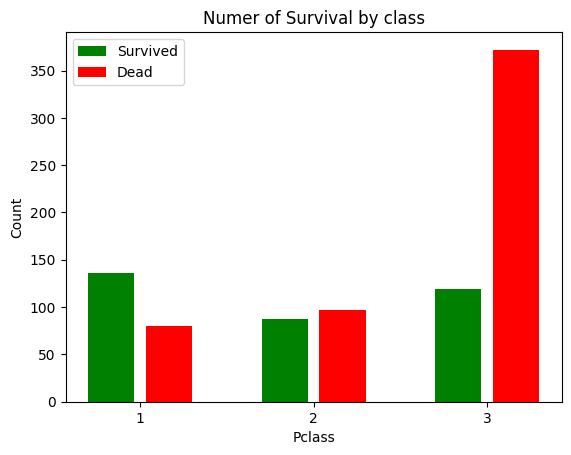

In [15]:
sclass1 = sum(train_data.loc[(train_data.Pclass == 1) & (train_data.Survived == 1), "Survived"])
sclass2=sum(train_data.loc[(train_data.Pclass == 2) & (train_data.Survived == 1), "Survived"])
sclass3=sum(train_data.loc[(train_data.Pclass == 3) & (train_data.Survived == 1), "Survived"])

dclass1 = len(train_data.loc[(train_data.Pclass == 1) & (train_data.Survived == 0), "Survived"])
dclass2=len(train_data.loc[(train_data.Pclass == 2) & (train_data.Survived == 0)])
dclass3=len(train_data.loc[(train_data.Pclass == 3) & (train_data.Survived == 0)])
print(sclass1,":",dclass1,sclass2,":",dclass2,sclass3,":", dclass3)

labels = ['Pclass1', 'Pclass2','Pclass3']
sclass = [sclass1, sclass2,sclass3]
dclass = [dclass2, dclass2,dclass3]

plt.bar([1, 4, 7], [sclass1, sclass2, sclass3], color='green', label='Survived')
plt.bar([2, 5, 8], [dclass1, dclass2, dclass3], color='red', label='Dead')
# Add titles and labels
plt.title('Numer of Survival by class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks([1.5, 4.5, 7.5], ['1', '2', '3'])
plt.legend()


plt.show()

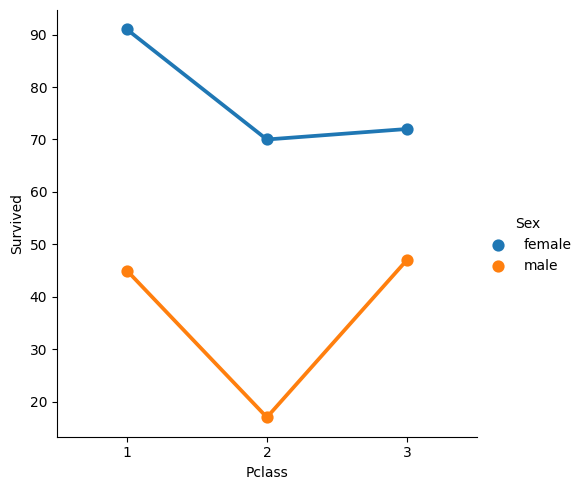

In [16]:
survived_by_sex_class = train_data.groupby(['Sex', 'Pclass'])['Survived'].sum().reset_index()

# Plot the catplot
sns.catplot(data=survived_by_sex_class, x='Pclass', y='Survived', hue='Sex', kind='point')

In [17]:
col_names = train_data.columns.values
col_names

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

80.0 0.42


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


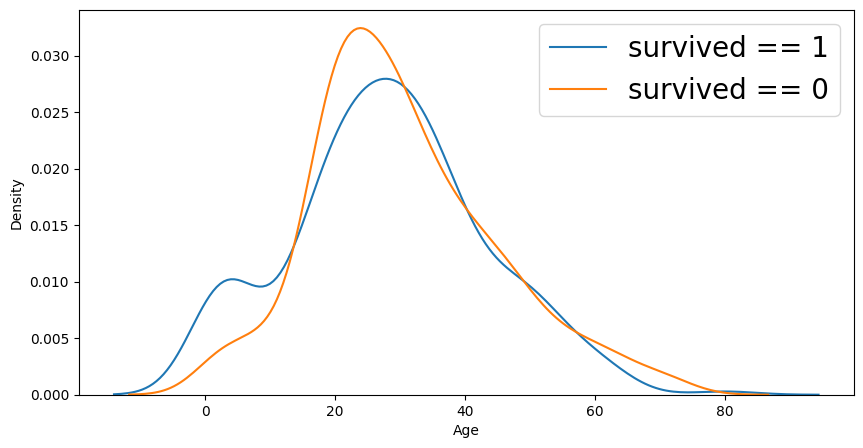

In [18]:
maxAge=train_data[col_names[5]].max()
minAge=train_data[col_names[5]].min()
print(maxAge,minAge)
f, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(train_data[train_data["Survived"] == 1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data["Survived"] == 0]['Age'], ax=ax)
plt.legend(['survived == 1', 'survived == 0'], fontsize='20')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


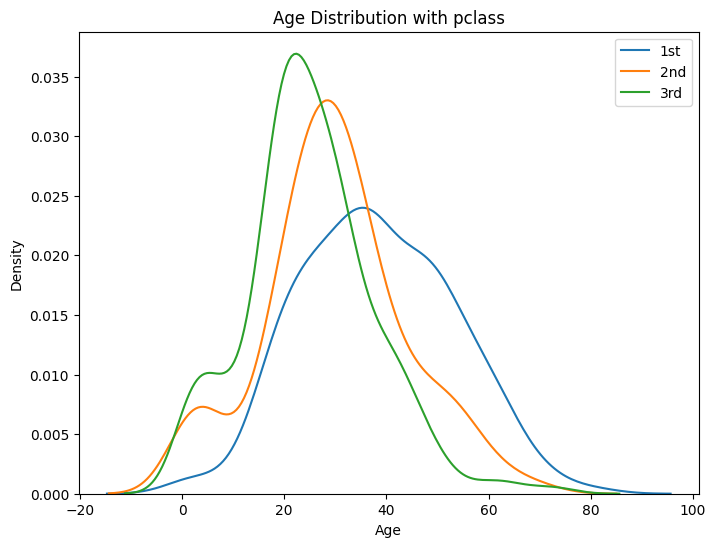

In [19]:

f, ax = plt.subplots(1, 1, figsize=(8, 6))

for i in range(1, 4):
    sns.kdeplot(train_data[train_data["Pclass"] == i]['Age'], ax=ax)

ax.set_title('Age Distribution with pclass')
ax.set_xlabel('Age')
ax.legend(['1st', '2nd', '3rd'])
plt.show()

# **RandomForest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
#X: features, y: labels
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])  #convert to dummy variables
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [21]:
X.shape

(891, 5)

In [22]:
pd.read_csv('submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**Evaluate the model performance**

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into training(80%) and validation sets(20%)  
#to avoid overfitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Scores: [0.76536313 0.80337079 0.80898876 0.79213483 0.8258427 ]
Mean CV Accuracy: 0.7991400414286611
Validation Accuracy: 0.7988826815642458
Confusion Matrix:
[[91 14]
 [22 52]]


In [24]:
X_train.shape


(712, 5)